# Projeto de Análise de Churn - Empresa de Telecomunicações

**Objetivo:** Este notebook tem como objetivo realizar uma análise completa sobre os dados de clientes de uma empresa de telecomunicações para identificar os principais fatores que levam ao *churn* (cancelamento de serviço). O projeto seguirá as seguintes etapas:
1.  Limpeza e Preparação dos Dados
2.  Análise Exploratória de Dados (EDA)
3.  Pré-processamento e Engenharia de Features
4.  Criação de um Modelo Preditivo de Machine Learning

## 1. Preparação do Ambiente e Carga dos Dados

Para iniciar o projeto, o primeiro passo é preparar o ambiente de trabalho. Farei a importação da biblioteca `pandas` para carregar e manipular os dados. As bibliotecas de visualização, `matplotlib` e `seaborn`, serão importadas na etapa de análise exploratória, quando forem necessárias.
- **Pandas:** para manipulação e análise dos dados.
- **Matplotlib e Seaborn:** para visualização de dados (serão adicionados na próxima etapa).

In [4]:
#Importar as bibliotecas
import pandas as pd
import seaborn as srn
import statistics as sts

Carregando o arquivo `WA_Fn-UseC_-Telco-Customer-Churn.csv` para um DataFrame do pandas e exibindo as 5 primeiras linhas para uma inspeção inicial.

In [23]:
# Importando a biblioteca pandas, que é fundamental para manipulação e análise de dados
import pandas as pd

# Carregando o arquivo CSV para um DataFrame do pandas
# A variável 'dados' agora contém todas as informações da nossa tabela
caminho_arquivo = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
dados = pd.read_csv(caminho_arquivo)

# Exibindo as 5 primeiras linhas para ter uma visão inicial dos dados
print("Amostra dos dados:")
dados.head()
                      

Amostra dos dados:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Diagnóstico e Preparação dos Dados

Com os dados carregados, o próximo passo é fazer um diagnóstico para entender a "saúde" do meu conjunto de dados.

Nesta etapa, vou investigar a estrutura da tabela, os tipos de dados de cada coluna e, o mais importante, verificar se existem valores ausentes. Fazer essa checagem agora é fundamental para garantir que qualquer problema seja corrigido antes que eu avance para a análise exploratória.

In [17]:
# Usando .info() para obter um resumo técnico do DataFrame
# Isso nos mostra os tipos de dados de cada coluna e a contagem de valores não nulos
print("Informações iniciais do DataFrame:")
dados.info()

Informações iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperle

### 2.1. Ajustando o Formato da Coluna `TotalCharges`

A análise inicial com `.info()` já revelou o primeiro problema que preciso corrigir: a coluna `TotalCharges` está formatada como `object` (texto), mas seus valores representam cobranças e deveriam ser numéricos.

Para resolver isso, vou converter a coluna usando a função `pd.to_numeric`. É importante usar o parâmetro `errors='coerce'`, pois essa abordagem irá transformar qualquer valor que não possa ser convertido (como um espaço em branco, por exemplo) em `NaN` (Not a Number). Isso me permitirá identificar e lidar com esses dados problemáticos na etapa seguinte, sem interromper a execução do código.

In [24]:
# Convertendo a coluna 'TotalCharges' para um tipo numérico
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

# Verificando a contagem de valores nulos que surgiram após a conversão
print("Contagem de valores nulos por coluna:")
dados.isnull().sum()

Contagem de valores nulos por coluna:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 2.2. Investigando a Origem dos Dados Ausentes

Como resultado da conversão, a coluna `TotalCharges` agora possui 11 valores nulos (`NaN`). Antes de tomar qualquer decisão, como simplesmente remover essas linhas, preciso investigar a causa raiz desse problema.

Minha principal hipótese é que esses valores nulos correspondam a clientes novos, que possuem `tenure` (tempo de contrato) igual a 0 e, por isso, ainda não geraram uma cobrança total. Para validar essa suposição, vou filtrar o DataFrame e analisar especificamente essas 11 linhas para confirmar se essa relação é verdadeira.

In [25]:
# Filtrando o DataFrame para exibir apenas as linhas onde 'TotalCharges' é nulo
# e confirmando nossa hipótese ao olhar a coluna 'tenure'
clientes_novos = dados[dados['TotalCharges'].isnull()]

print("Clientes com valores ausentes em 'TotalCharges':")
print(clientes_novos[['tenure', 'MonthlyCharges', 'TotalCharges']])

Clientes com valores ausentes em 'TotalCharges':
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


A análise que realizei na etapa anterior confirma minha hipótese: os 11 clientes com `TotalCharges` nulo são, de fato, clientes novos com `tenure` igual a 0.

Com essa confirmação, tenho a segurança para justificar minha decisão de **remover essas linhas**, em vez de tentar preenchê-las com algum valor. Minha decisão se baseia em dois pontos principais:

1.  **Manter a Integridade dos Dados:** Pela lógica do negócio, não faria sentido eu imputar um valor de cobrança (como a média, por exemplo) para um cliente que ainda não completou o primeiro mês. Fazer isso criaria um dado artificial e inconsistente que poderia prejudicar a análise.
2.  **Impacto Estatístico Mínimo:** Estou lidando com apenas 11 linhas em um universo de mais de 7.000. A exclusão de uma amostra tão pequena não irá distorcer as distribuições gerais dos dados nem enfraquecer o desempenho do futuro modelo de machine learning.

Com isso justificado, o próximo passo é aplicar a remoção para finalizar a etapa de limpeza.

### 2.3. Aplicando a Limpeza e Finalizando a Preparação

Com minha decisão sobre os dados nulos devidamente justificada, agora vou executar a limpeza final no meu DataFrame.

Utilizarei o método `.dropna()` para remover as 11 linhas problemáticas. Logo em seguida, farei uma checagem completa com `.isnull().sum()` e `.info()` para certificar que o conjunto de dados está agora íntegro, sem valores ausentes e com os tipos de dados corretos, pronto para a próxima fase do projeto: a Análise Exploratória.

In [26]:
# Removendo as linhas que contêm qualquer valor nulo no DataFrame
# O argumento inplace=True modifica o DataFrame 'dados' diretamente
dados.dropna(inplace=True)

# Verificação final para garantir que não há mais valores nulos
print("Verificação de valores nulos após a remoção:")
print(dados.isnull().sum())

print("\n-------------------------------------------------\n")

# Exibindo as informações do DataFrame para confirmar a nova contagem de entradas
print("Informações finais do DataFrame após a limpeza:")
dados.info()

Verificação de valores nulos após a remoção:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

-------------------------------------------------

Informações finais do DataFrame após a limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   obje

## 3. Análise Exploratória de Dados (EDA) - Análise Univariada

Com os dados limpos e preparados, inicio agora a fase de Análise Exploratória. O primeiro passo é a análise univariada, onde vou investigar cada variável individualmente para entender sua distribuição e características.

Para as variáveis numéricas, vou utilizar histogramas para ver a forma da distribuição e boxplots para identificar a dispersão, os quartis e possíveis outliers.

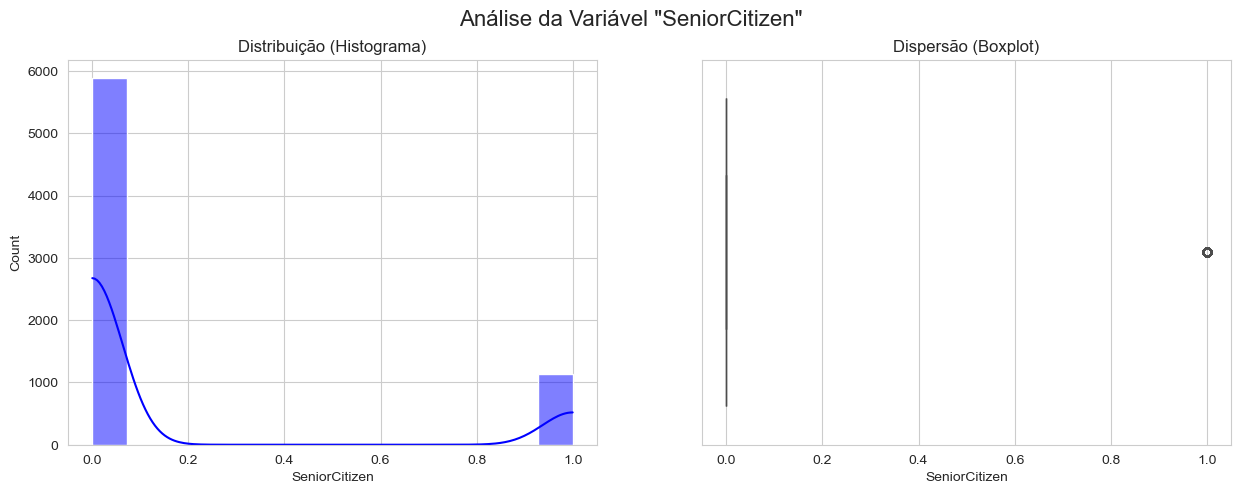

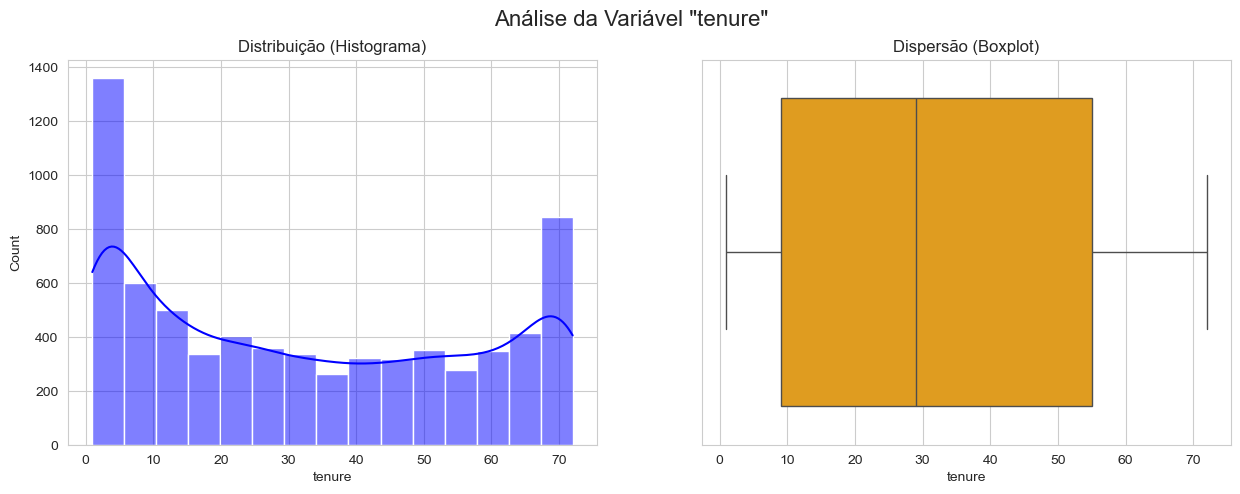

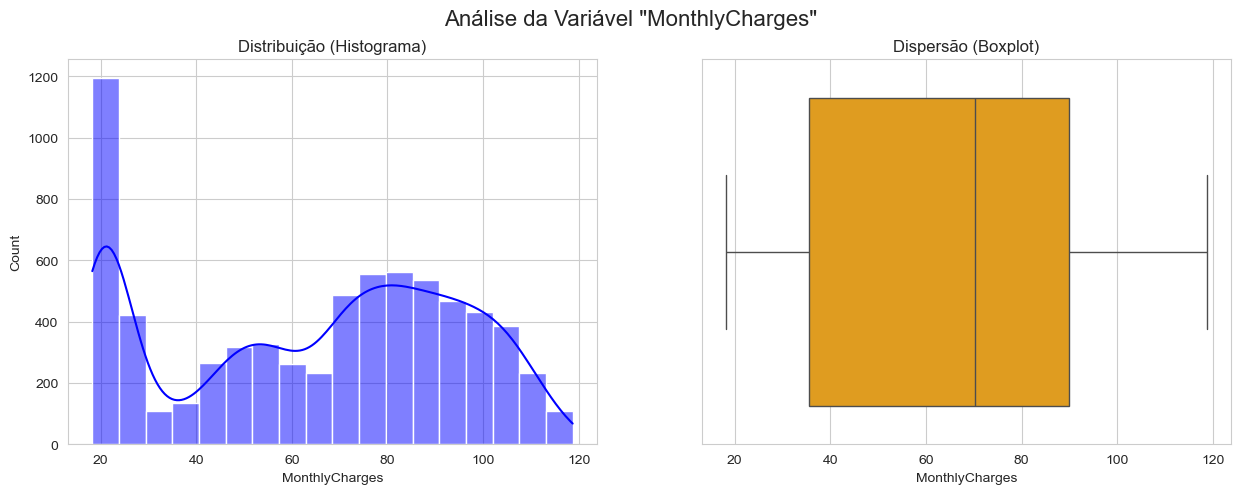

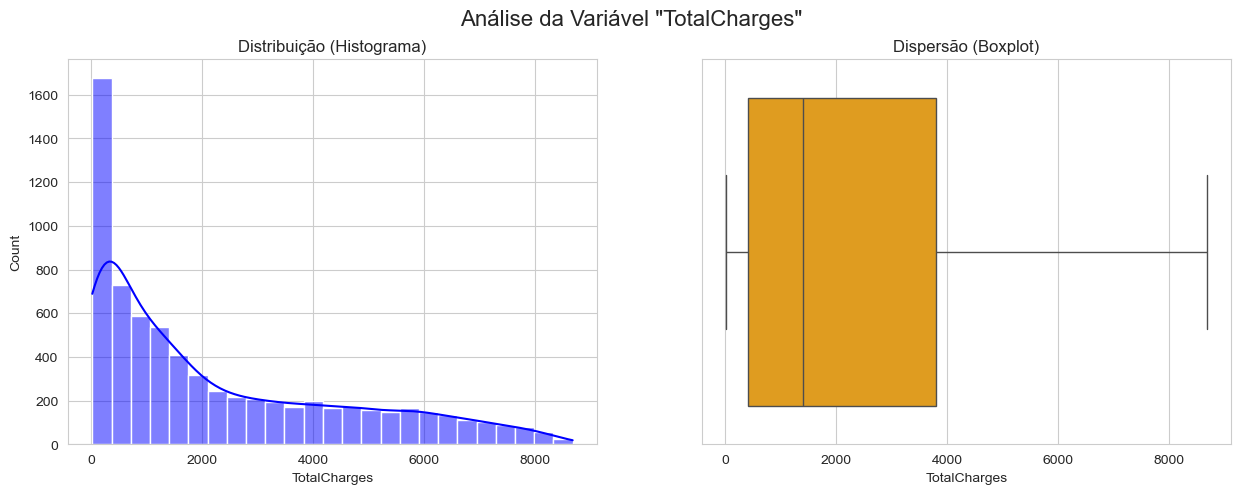

In [28]:

# Configurando o estilo dos gráficos
sns.set_style('whitegrid')

# Selecionando apenas as colunas numéricas do DataFrame
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Loop para criar um histograma e um boxplot para cada coluna numérica
for coluna in colunas_numericas:
    # Criando a figura com dois subplots (um para o histograma, outro para o boxplot)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Título principal da figura
    fig.suptitle(f'Análise da Variável "{coluna}"', fontsize=16)
    
    # Histograma
    sns.histplot(data=dados, x=coluna, kde=True, ax=axes[0], color='blue')
    axes[0].set_title('Distribuição (Histograma)')
    
    # Boxplot
    sns.boxplot(data=dados, x=coluna, ax=axes[1], color='orange')
    axes[1].set_title('Dispersão (Boxplot)')
    
    # Mostrando os gráficos
    plt.show()
    print("\n" + "="*80 + "\n")

### 3.1. Análise Bivariada - Variáveis Numéricas vs. Churn

Após entender as distribuições individuais, o próximo passo crucial é investigar como as variáveis numéricas se relacionam com a variável alvo, `Churn`. Quero descobrir se existem diferenças nos perfis de `tenure`, `MonthlyCharges` e `TotalCharges` entre os clientes que cancelaram e os que permaneceram. Para isso, vou usar boxplots comparativos.

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\482466613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Churn', y=coluna, palette='viridis')


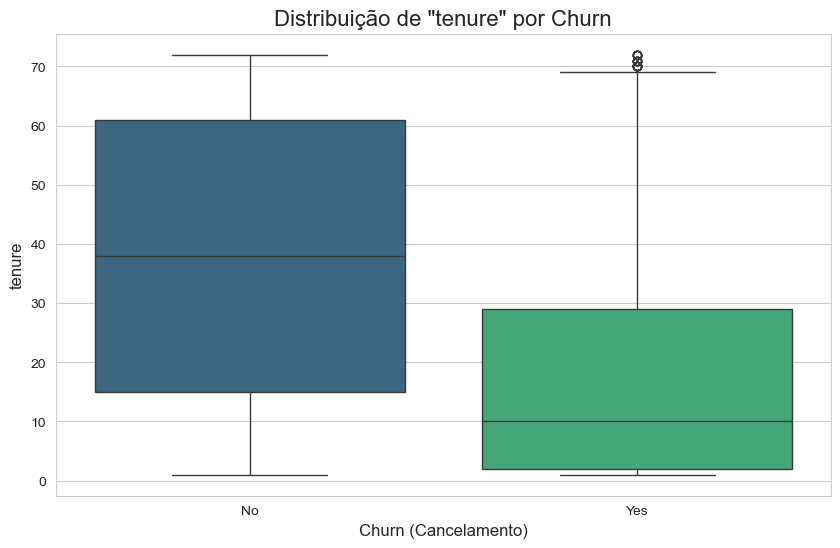

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\482466613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Churn', y=coluna, palette='viridis')


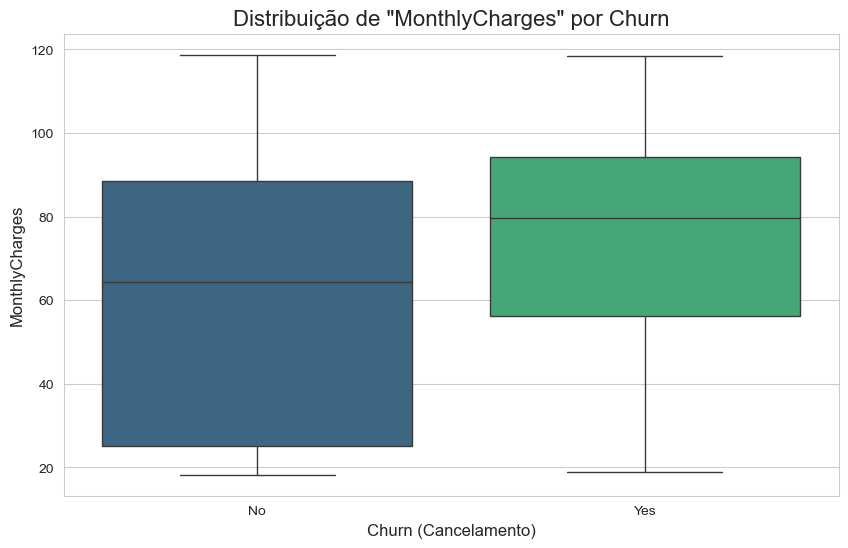

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\482466613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Churn', y=coluna, palette='viridis')


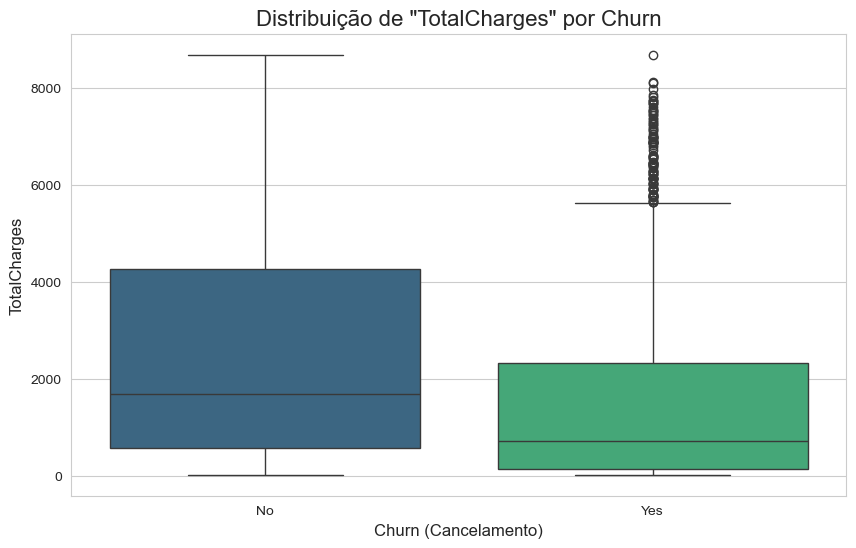

In [29]:
# Lista das colunas numéricas que quero analisar contra o Churn
colunas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Criando um loop para gerar um boxplot para cada coluna numérica
for coluna in colunas_numericas:
    # Criando a figura
    plt.figure(figsize=(10, 6))
    
    # Criando o boxplot comparativo
    sns.boxplot(data=dados, x='Churn', y=coluna, palette='viridis')
    
    # Adicionando título
    plt.title(f'Distribuição de "{coluna}" por Churn', fontsize=16)
    plt.xlabel('Churn (Cancelamento)', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    
    # Exibindo o gráfico
    plt.show()
    print("\n" + "="*80 + "\n")

### 3.2. Análise Bivariada - Variáveis Categóricas vs. Churn

Agora, vou fazer a análise mais importante: investigar como as características dos serviços e contratos dos clientes impactam a taxa de cancelamento. Para cada categoria, vou calcular a `Churn Rate` (Taxa de Churn) e visualizar os resultados em gráficos de barras para identificar quais fatores mais contribuem para a perda de clientes.

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\989921409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_yes.index, y=churn_rate_yes.values, palette='viridis')


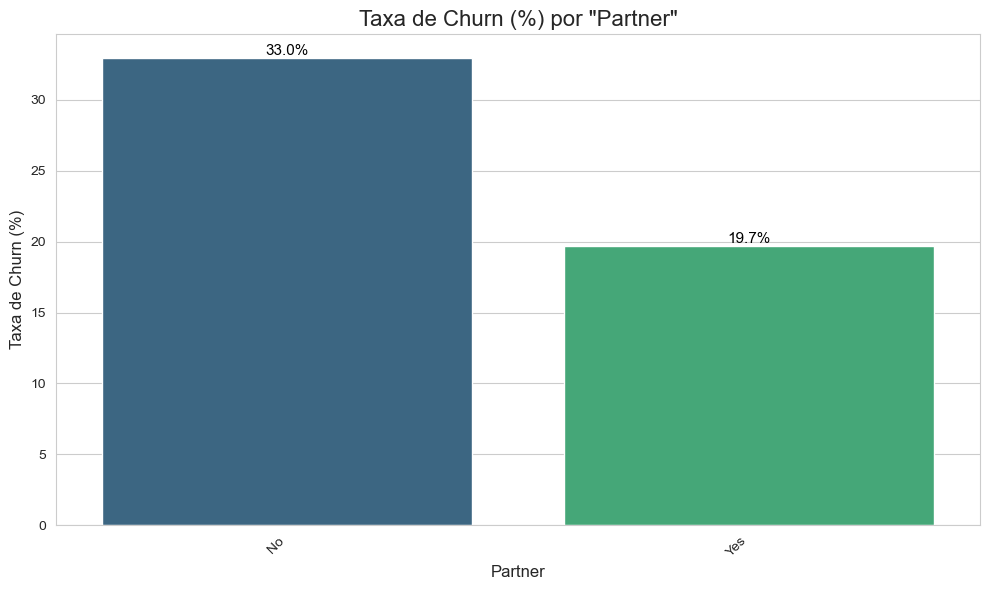

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\989921409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_yes.index, y=churn_rate_yes.values, palette='viridis')


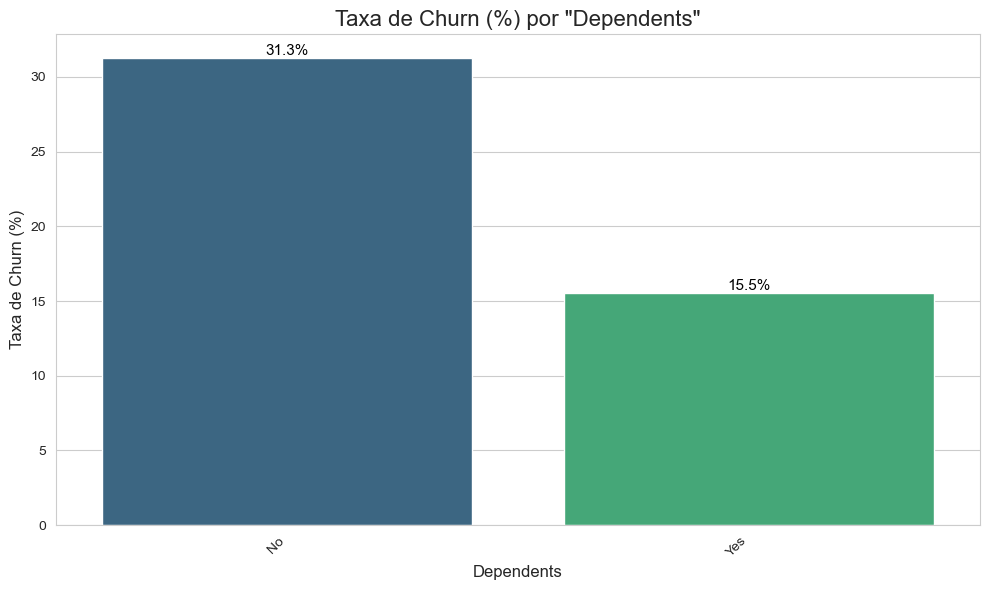

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\989921409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_yes.index, y=churn_rate_yes.values, palette='viridis')


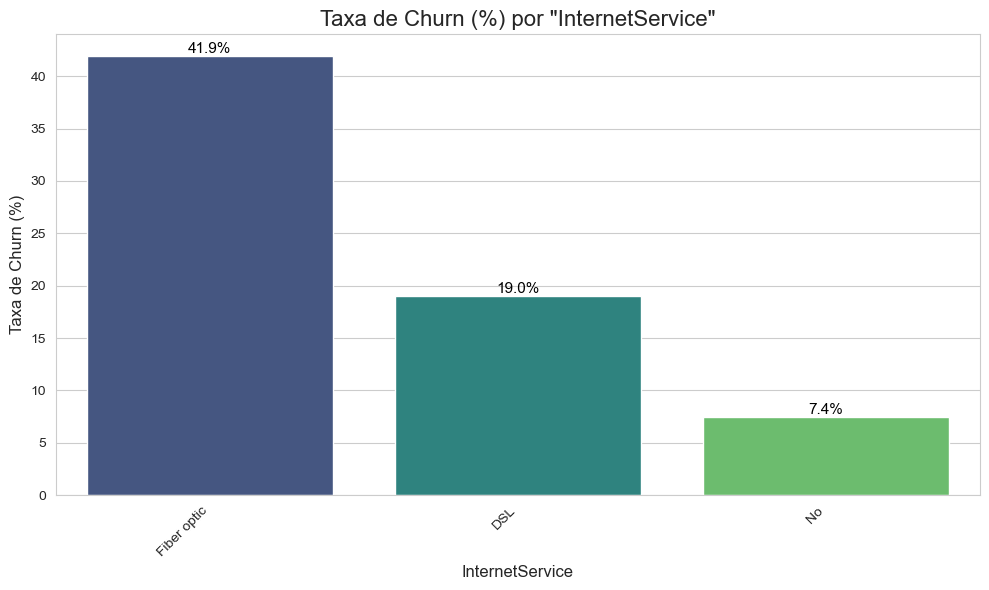

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\989921409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_yes.index, y=churn_rate_yes.values, palette='viridis')


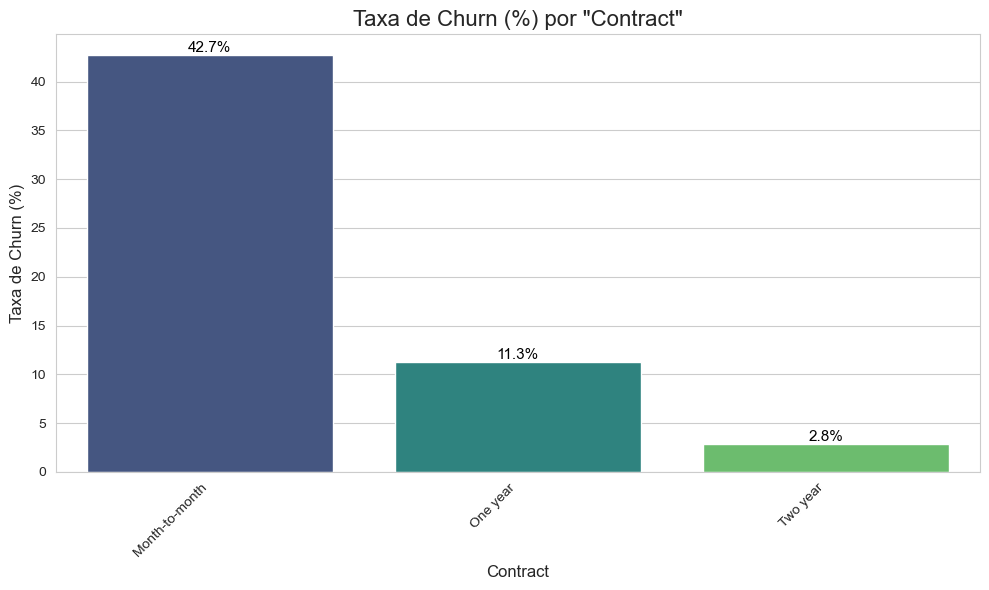

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\989921409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_yes.index, y=churn_rate_yes.values, palette='viridis')


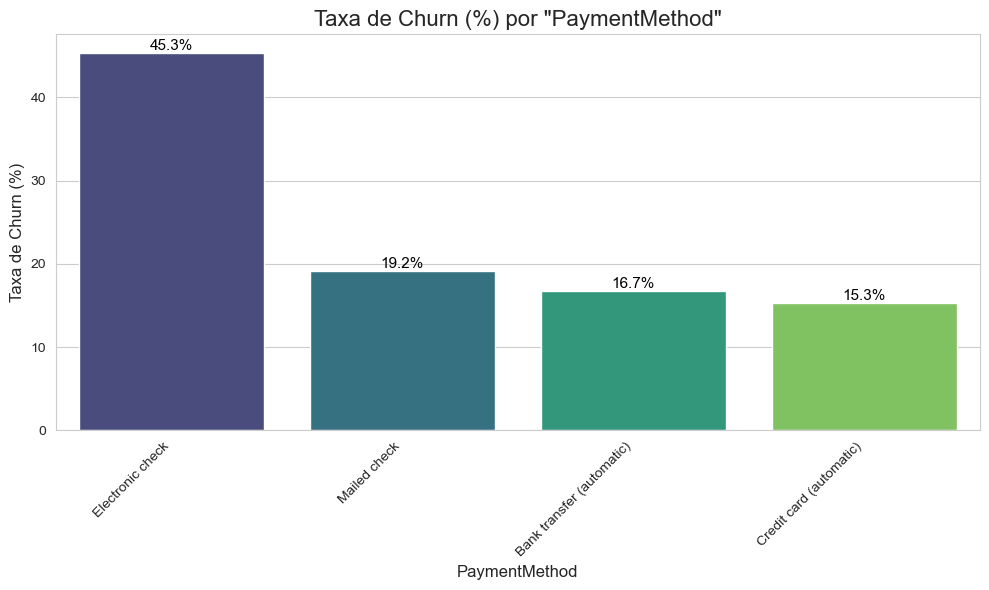

C:\Users\marlo\AppData\Local\Temp\ipykernel_18172\989921409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate_yes.index, y=churn_rate_yes.values, palette='viridis')


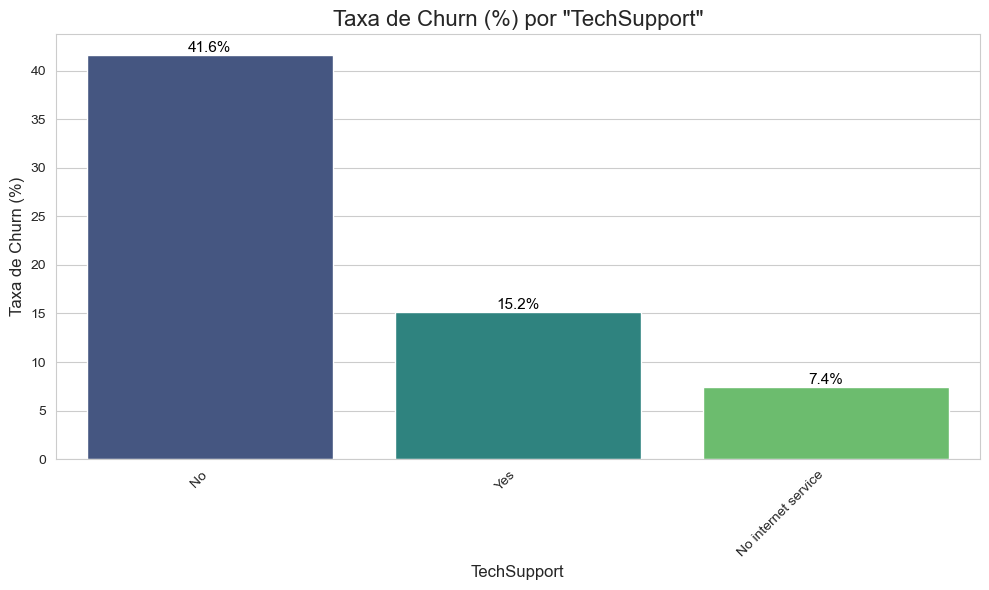

In [30]:
# Lista de algumas colunas categóricas importantes para analisar
# Excluímos 'gender' pois geralmente tem baixo impacto, mas você pode incluir se quiser
colunas_categoricas_importantes = [
    'Partner', 'Dependents', 'InternetService', 
    'Contract', 'PaymentMethod', 'TechSupport'
]

# Loop para criar um gráfico de taxa de churn para cada coluna
for coluna in colunas_categoricas_importantes:
    # Calculando a taxa de churn para cada categoria da coluna
    # Agrupamos pela categoria, selecionamos a coluna Churn, e calculamos a média dos valores (onde 'Yes'=1 e 'No'=0)
    churn_rate = dados.groupby(coluna)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate_yes = churn_rate['Yes'].sort_values(ascending=False) * 100
    
    # Criando a figura
    plt.figure(figsize=(10, 6))
    
    # Criando o gráfico de barras
    ax = sns.barplot(x=churn_rate_yes.index, y=churn_rate_yes.values, palette='viridis')
    
    # Adicionando título e rótulos
    plt.title(f'Taxa de Churn (%) por "{coluna}"', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Taxa de Churn (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Adicionando os valores em cima das barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")